In [12]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 2) compute mean *signed* importance per attribute
node_masks = pickle.load(open("explainer/GCN-export-node_feat.pkl", "rb"))
edge_attr_masks = pickle.load(open("explainer/GCN-export-edge_attr.pkl", "rb"))
global_node_imp_div      = node_masks.mean(axis=0)   # shape: (num_node_features,)
global_edge_attr_imp_div = edge_attr_masks.mean(axis=0)  # shape: (num_edge_features,)

global_node_imp = np.mean(np.abs(node_masks), axis=0)
global_edge_attr_imp = np.mean(np.abs(edge_attr_masks), axis=0)

feat_labels = np.array(["COI", "ECI", "# Prod.", "SRCA"] + [f"Geo-{x}" for x in range(1, 9)] + ["HHI", "Trustworthiness"])

node_feat_relative_importance = node_masks.mean(axis=0) / node_masks.mean(axis=0).sum()
ix_order = np.argsort(node_feat_relative_importance)[::-1][:5]

In [58]:
edge_attr_masks.shape

(746866,)

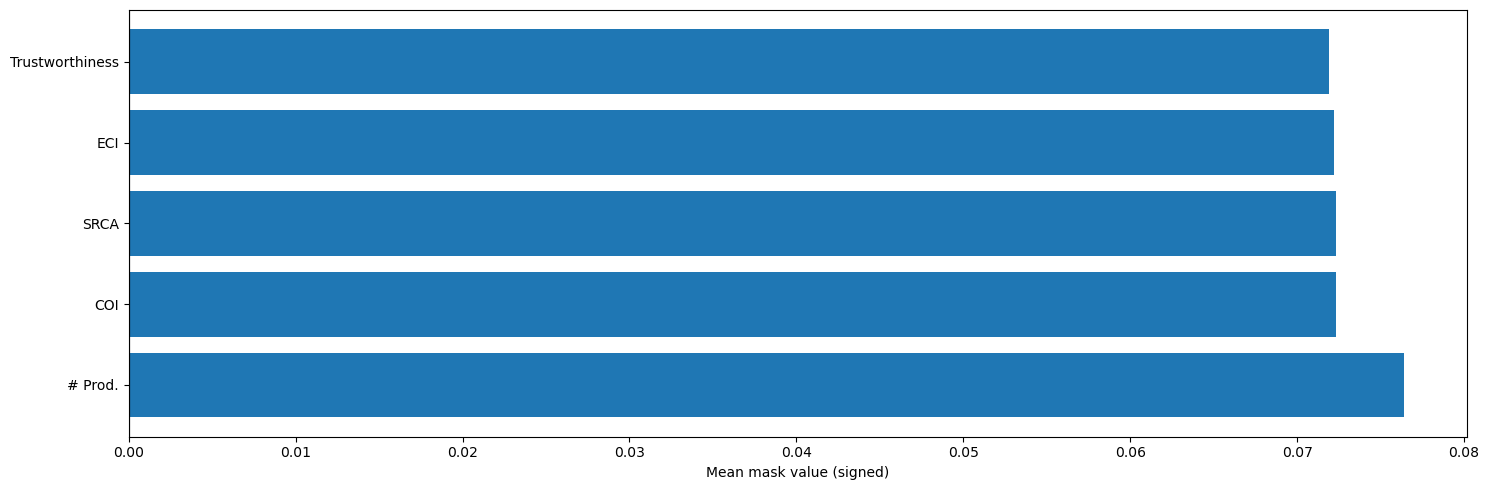

In [57]:
# --- Node‐feature importance plot ---
fig, ax = plt.subplots(figsize=(15,5))

ax.barh(feat_labels[ix_order], node_feat_relative_importance[ix_order])

#ax.set_yticklabels(feat_labels)
ax.set_xlabel("Mean mask value (signed)")
ax.axvline(0, color="k", linewidth=0.8)
plt.tight_layout()
plt.show()

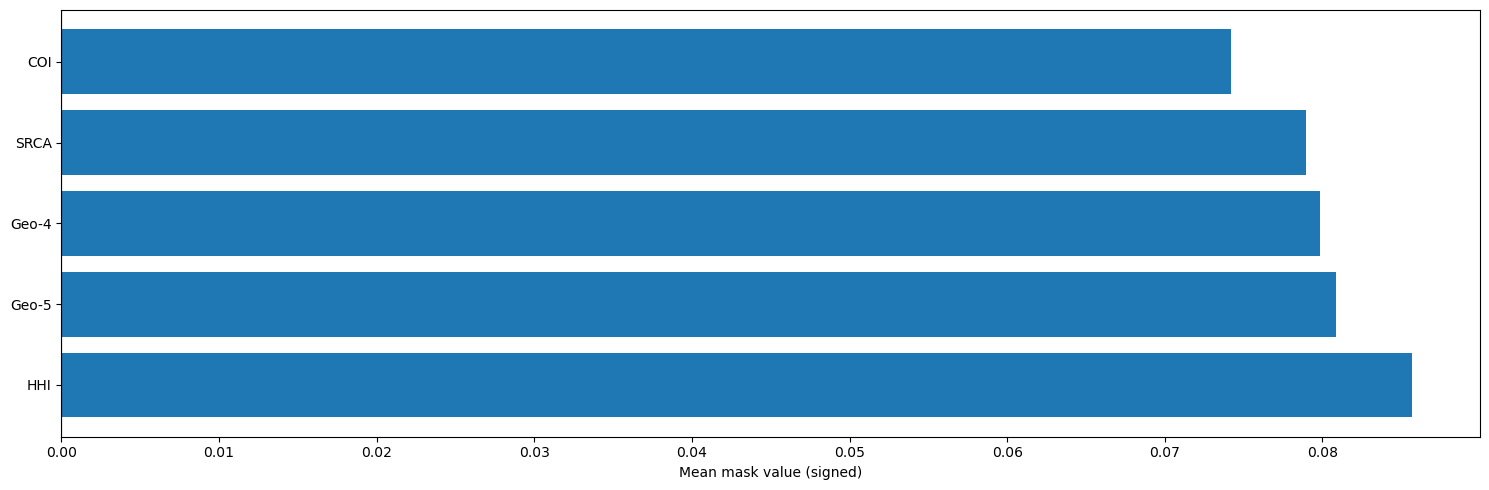

In [62]:
# 2) compute mean *signed* importance per attribute
node_masks = pickle.load(open("explainer/GCN-phenomenon-export-node_feat.pkl", "rb"))
#edge_attr_masks = pickle.load(open("explainer/GCN-export-edge_attr.pkl", "rb"))
global_node_imp_div      = node_masks.mean(axis=0)   # shape: (num_node_features,)
#global_edge_attr_imp_div = edge_attr_masks.mean(axis=0)  # shape: (num_edge_features,)

global_node_imp = np.mean(np.abs(node_masks), axis=0)
#global_edge_attr_imp = np.mean(np.abs(edge_attr_masks), axis=0)

feat_labels = np.array(["COI", "ECI", "# Prod.", "SRCA"] + [f"Geo-{x}" for x in range(1, 9)] + ["HHI", "Trustworthiness"])

node_feat_relative_importance = node_masks.mean(axis=0) / node_masks.mean(axis=0).sum()
ix_order = np.argsort(node_feat_relative_importance)[::-1][:5]

# --- Node‐feature importance plot ---
fig, ax = plt.subplots(figsize=(15,5))

ax.barh(feat_labels[ix_order], node_feat_relative_importance[ix_order])

#ax.set_yticklabels(feat_labels)
ax.set_xlabel("Mean mask value (signed)")
ax.axvline(0, color="k", linewidth=0.8)
plt.tight_layout()
plt.show()